In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import datetime 

In [72]:
#Load Data
df = pd.read_csv("ecommerce_customer_data_large.csv")
df2 = df.copy()

df.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,31,Female,0
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0.0,John Rivera,31,Female,0
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1.0,John Rivera,31,Female,0


In [73]:
# Set seed for reproducibility
np.random.seed(42)

# -------------------------
# 1. Simulate purchase behavior
# -------------------------

# Define custom probabilities: electronics have lower purchase rate
def assign_purchase(row):
    if row['Product Category'].lower() == 'electronics':
        return np.random.choice([0, 1], p=[0.7, 0.3])  # 70% no purchase
    else:
        return np.random.choice([0, 1], p=[0.6, 0.4])  # 60% no purchase

# Apply to dataset
df['Purchased'] = df.apply(assign_purchase, axis=1)

# -------------------------
# 2. Adjust Total Purchase Amount and Quantity for no-purchase customers
# -------------------------
df.loc[df['Purchased'] == 0, ['Total Purchase Amount', 'Quantity']] = 0



In [74]:
df.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn,Purchased
0,44605,2023-05-03 21:30:02,Home,177,0,0,PayPal,31,1.0,John Rivera,31,Female,0,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0,1
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,31,Female,0,1
3,44605,2023-01-17 13:14:36,Electronics,396,0,0,Cash,31,0.0,John Rivera,31,Female,0,0
4,44605,2021-05-01 11:29:27,Books,259,0,0,PayPal,31,1.0,John Rivera,31,Female,0,0


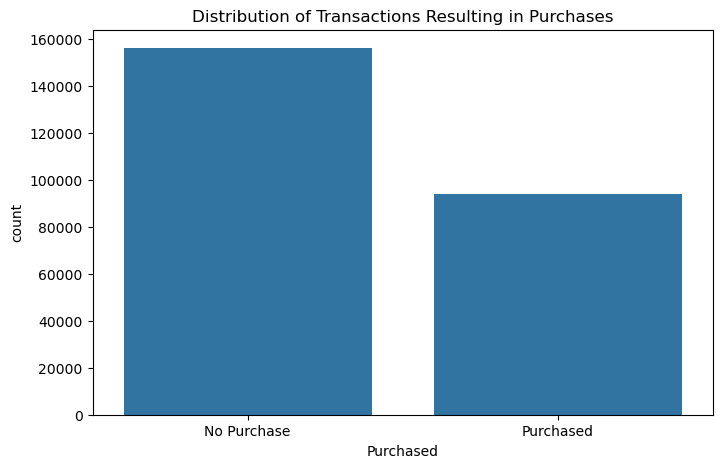

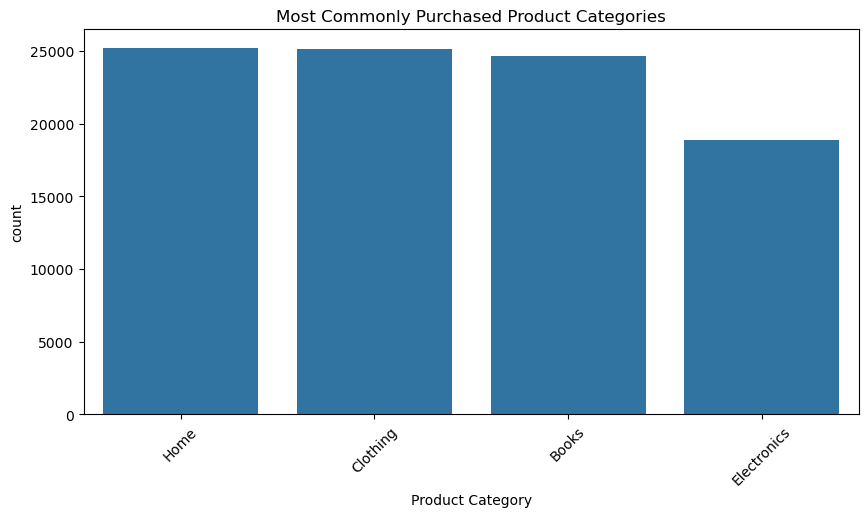

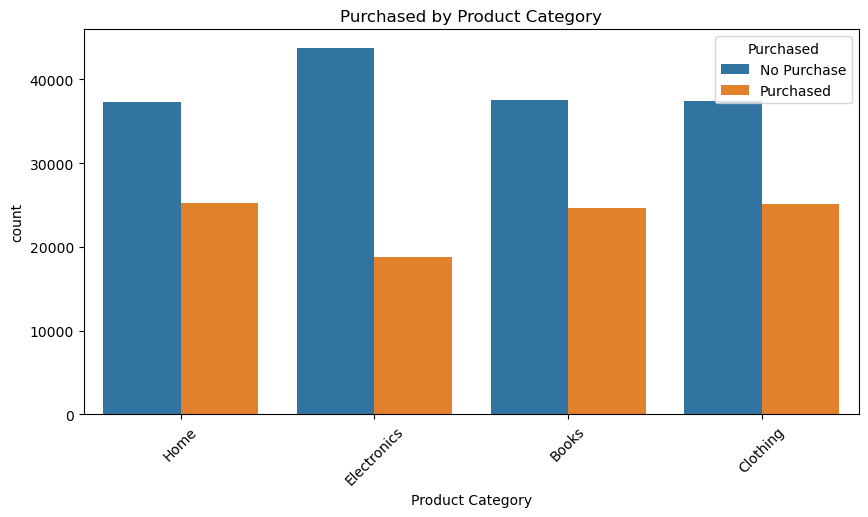

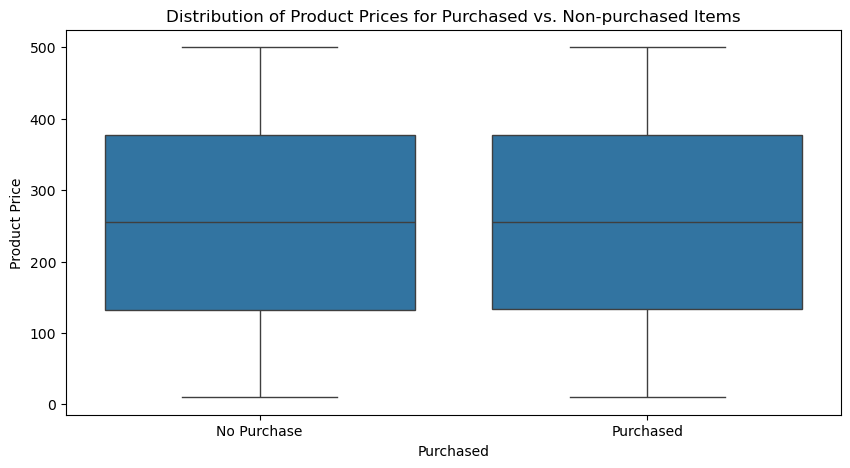

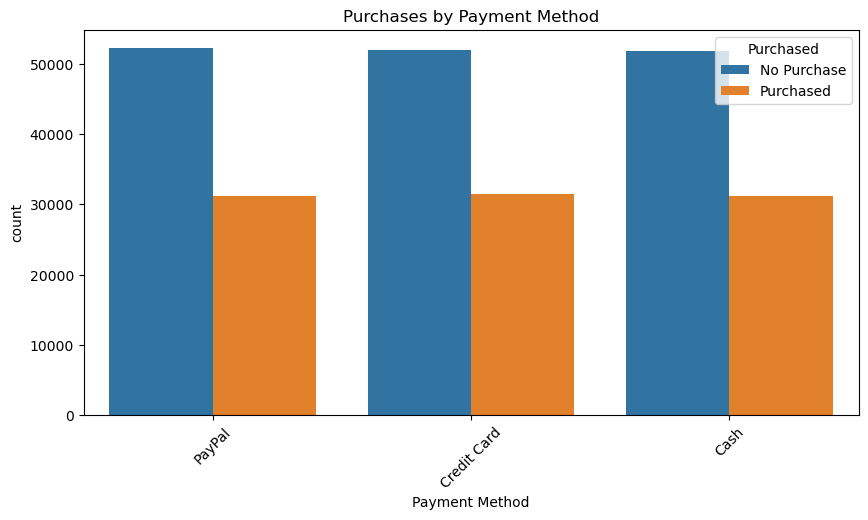

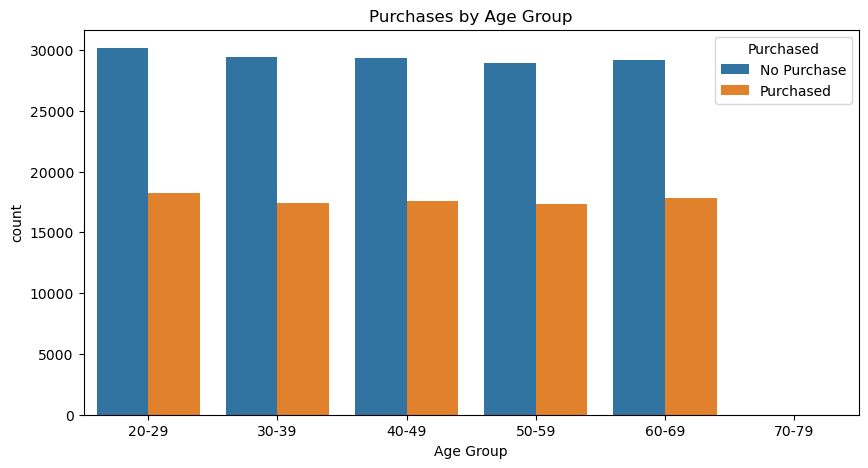

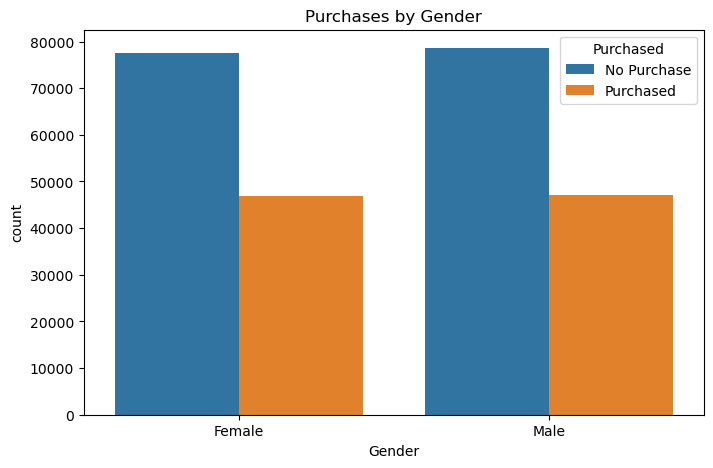

In [75]:
# Convert Purchased column to a more descriptive format for visualization
df['Purchased'] = df['Purchased'].map({0: 'No Purchase', 1: 'Purchased'})

# Create the 'Age Group' column
age_bins = [20, 30, 40, 50, 60, 70, 80]
df['Age Group'] = pd.cut(df['Customer Age'], bins=age_bins, labels=['20-29', '30-39', '40-49', '50-59', '60-69', '70-79'])

# 1. Percentage of transactions that resulted in Purchases
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Purchased')
plt.title('Distribution of Transactions Resulting in Purchases')
plt.show()

# 2. Most commonly purchases product categories
plt.figure(figsize=(10, 5))
purchased_products = df[df['Purchased'] == 'Purchased']
sns.countplot(data=purchased_products, x='Product Category', order=purchased_products['Product Category'].value_counts().index)
plt.title('Most Commonly Purchased Product Categories')
plt.xticks(rotation=45)
plt.show()

# 3. Correlation between returns and specific product categories, prices, or payment methods
# For Product Categories
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Product Category', hue='Purchased')
plt.title('Purchased by Product Category')
plt.xticks(rotation=45)
plt.show()

# For Product Prices
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Purchased', y='Product Price')
plt.title('Distribution of Product Prices for Purchased vs. Non-purchased Items')
plt.show()

# For Payment Methods
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Payment Method', hue='Purchased')
plt.title('Purchases by Payment Method')
plt.xticks(rotation=45)
plt.show()


# 4. Analysis of returns by age group or gender
# For Age Groups
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Age Group', hue='Purchased')
plt.title('Purchases by Age Group')
plt.show()

# For Gender
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Gender', hue='Purchased')
plt.title('Purchases by Gender')
plt.show()



In [76]:
electronics_customers = df[df['Product Category'] == "Electronics"]

electronics_purchasing_customers = df[(df['Product Category'] == "Electronics") & (df['Purchased'] == 'Purchased')]


In [77]:
electronics_customers.to_csv("electronics_customers.csv")

electronics_purchasing_customers.to_csv("electronics_purchasing_customers.csv")

### Simulating up A/B test 

In [78]:
# -------------------------
# 1. Assign A/B groups
# -------------------------
df2['AB_Group'] = np.random.choice(['A', 'B'], size=len(df2))

In [80]:
# -------------------------
# 2. Simulate purchases with 10% higher purchase likelihood in Group B
# -------------------------

# Define function to simulate purchase behavior
def simulate_purchase(row):
    if row['AB_Group'] == 'A':
        return np.random.choice([1, 0], p=[0.30, 0.70])
    else:  # Group B (test group with new website)
        return np.random.choice([1, 0], p=[0.33, 0.67])  # 10% increase relative to Group A

df2['Purchased'] = df2.apply(simulate_purchase, axis=1)

# Set Purchase Amount and Quantity based on purchase status
df2.loc[df2['Purchased'] == 0, ['Total Purchase Amount', 'Quantity']] = 0


In [83]:
# -------------------------
# 3. Analyze and show the result
# -------------------------
summary = df2.groupby('AB_Group')['Purchased'].mean().reset_index()
summary.columns = ['Group', 'Purchase Rate']

print(summary)

  Group  Purchase Rate
0     A       0.299288
1     B       0.329993


In [88]:
# Filter to include only electronics

electronics_ab = df2[df2['Product Category'] == "Electronics"]

summary1 = electronics_ab.groupby('AB_Group')['Purchased'].mean().reset_index()
summary1.columns = ['Group', 'Purchase Rate']

print(summary1)

  Group  Purchase Rate
0     A       0.300811
1     B       0.333376


In [89]:
# Save data
electronics_ab.to_csv('electronics_ab_test_simulated_10pct_lift.csv', index=False)